In [1]:
import numpy as np
import pandas as pd

from PIL import Image

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print('Data download and read into a dataframe')

Data download and read into a dataframe


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)

In [6]:
df_can.columns = list(map(str, df_can.columns))

In [7]:
df_can.set_index('Country',inplace=True)

In [8]:
df_can['Total']=df_can.sum(axis=1)

C:\Users\perma\AppData\Local\Temp/ipykernel_1100/1816195432.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


In [9]:
years = list(map(str,range(1980,2014)))
print ('data dimensions:',df_can.shape)

data dimensions: (195, 38)


In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.4.3


In [13]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]

In [14]:
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [ ]:
def create_waffle_chart(categories, values, height, widht, colormap, value_sign=''):
    total_values=sum(values)
    category_proportions=[(float(value)/total_values) for value in values]
    total_num_tiles=width * height
    print ('Total number of tiles is', total_num_tiles)
    tiles_per_category = 

In [16]:
!pip install wordcloud

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\perma\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\perma\\AppData\\Local\\Temp\\pip-install-y4h6q8bs\\wordcloud_701da6f07b0f4c049c16971c559fd75c\\setup.py'"'"'; __file__='"'"'C:\\Users\\perma\\AppData\\Local\\Temp\\pip-install-y4h6q8bs\\wordcloud_701da6f07b0f4c049c16971c559fd75c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\perma\AppData\Local\Temp\pip-record-_tn82crm\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\perma\appdata\local\programs\python\python39\Include\wordcloud'
         cwd: C:\Users\perma\AppData\Local\Temp\pip-inst


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


In [18]:
alice_novel = open('alice_novel.txt','r').read()

In [19]:
df_tot=pd.DataFrame(df_can[years].sum(axis=0))

In [20]:
df_tot.index=map(float,df_tot.index)

In [21]:
df_tot.reset_index(inplace=True)

In [22]:
df_tot.columns=['year','total']

In [23]:
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


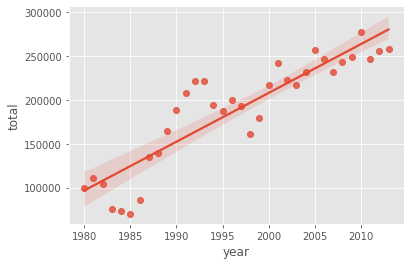

In [26]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

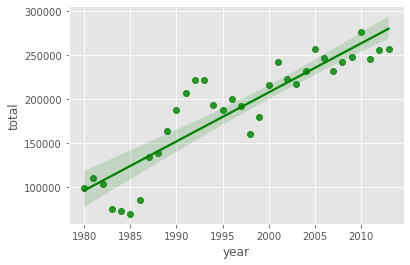

In [27]:
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'green')

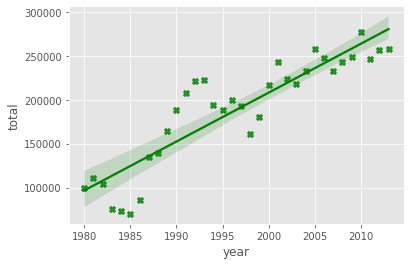

In [28]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='X')

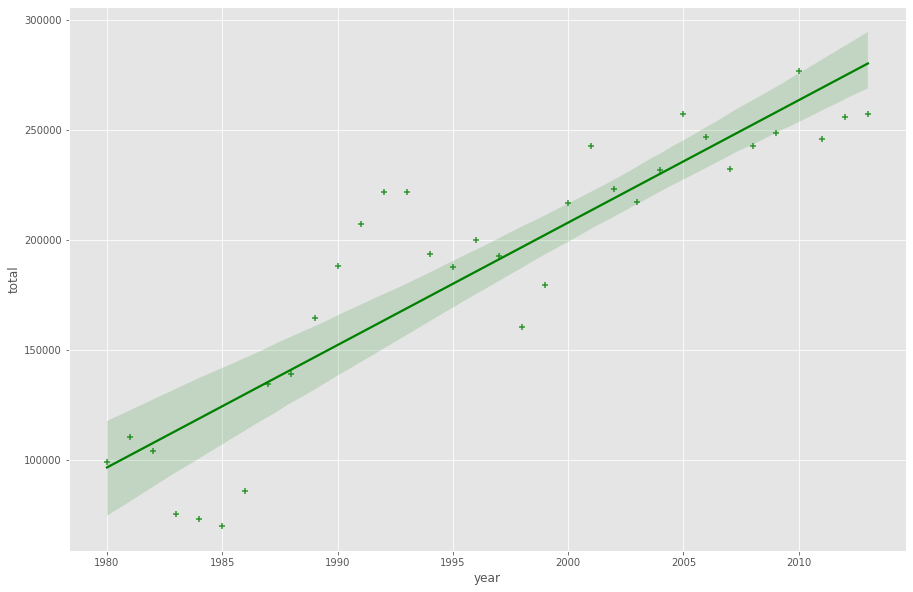

In [29]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

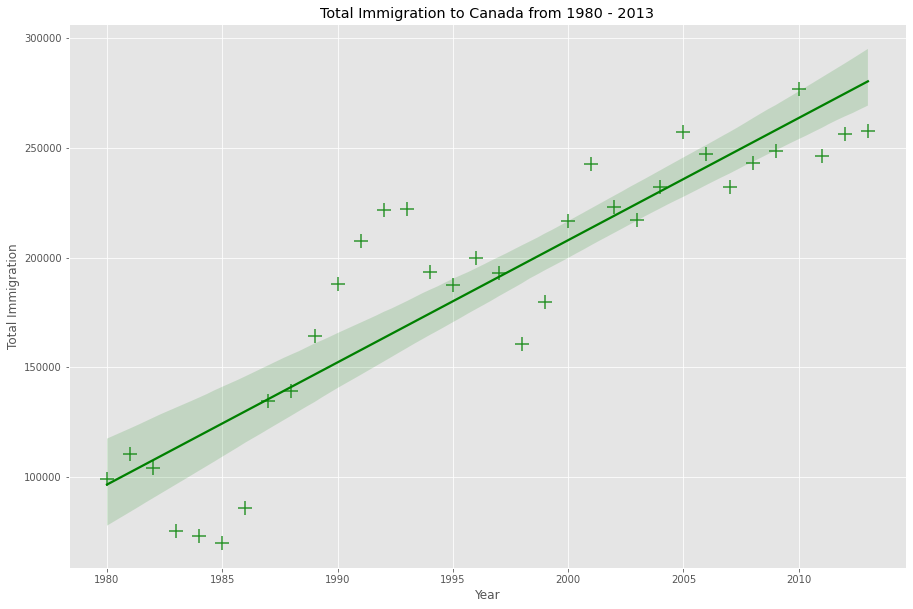

In [30]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+',
                scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationfrom Denmark, Sweden, and Norway to Canada from 1980 - 2013')

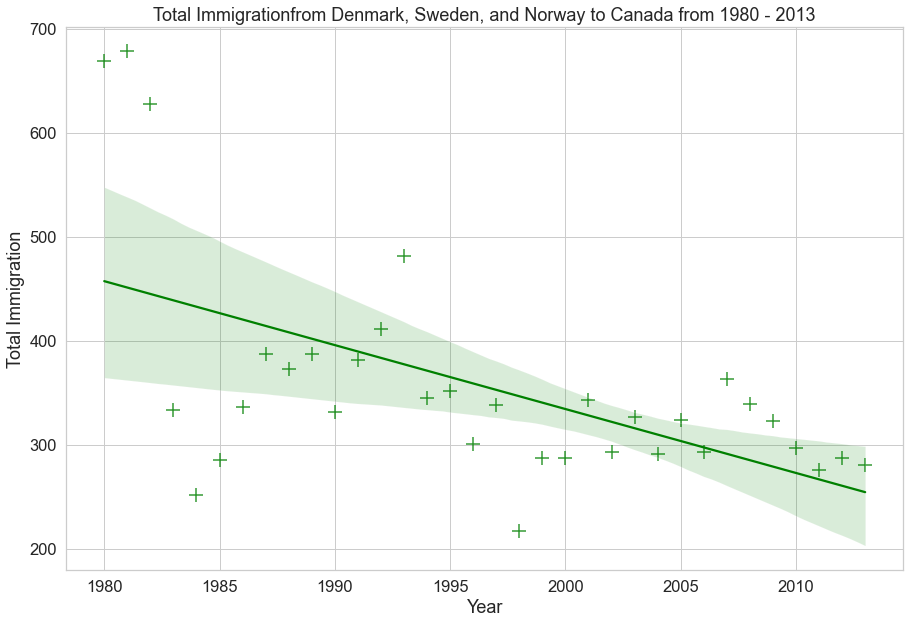

In [31]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year','total']
df_total['year']=df_total['year'].astype(int)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_total, color='green', 
                 marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationfrom Denmark, Sweden, and Norway to Canada from 1980 - 2013')

In [33]:
import folium
world_map = folium.Map()

world_map

In [35]:
world_map = folium.Map(location=[-6.992620,110.428009], zoom_start=11)
world_map